In [75]:
import numpy as np
from Utils.discrete_family import discrete_family
from Utils.barrier_affine import solve_barrier_tree, solve_barrier_tree_nonneg, solve_barrier_tree_box_PGD
from CART import RegressionTree
from scipy.interpolate import interp1d
from scipy.stats import multivariate_normal as mvn
from Utils.plotting import  *
from Utils.simulation_helpers import *
from time import time
import cvxpy as cp

In [76]:
n = 50
p = 5
X = np.random.normal(size=(n, p))
a = 1
b = 1
np.random.seed(201)

mu = b * ((X[:, 0] <= 0) * (1 + a * (X[:, 1] > 0) + (X[:, 2] * X[:, 1] <= 0)))
sd = 1
noise_sd = 2
y = mu + np.random.normal(size=(n,), scale=sd)
# Create and train the regression tree
reg_tree = RegressionTree(min_samples_split=10, max_depth=1, min_proportion=0)
reg_tree.fit(X, y, sd=0)

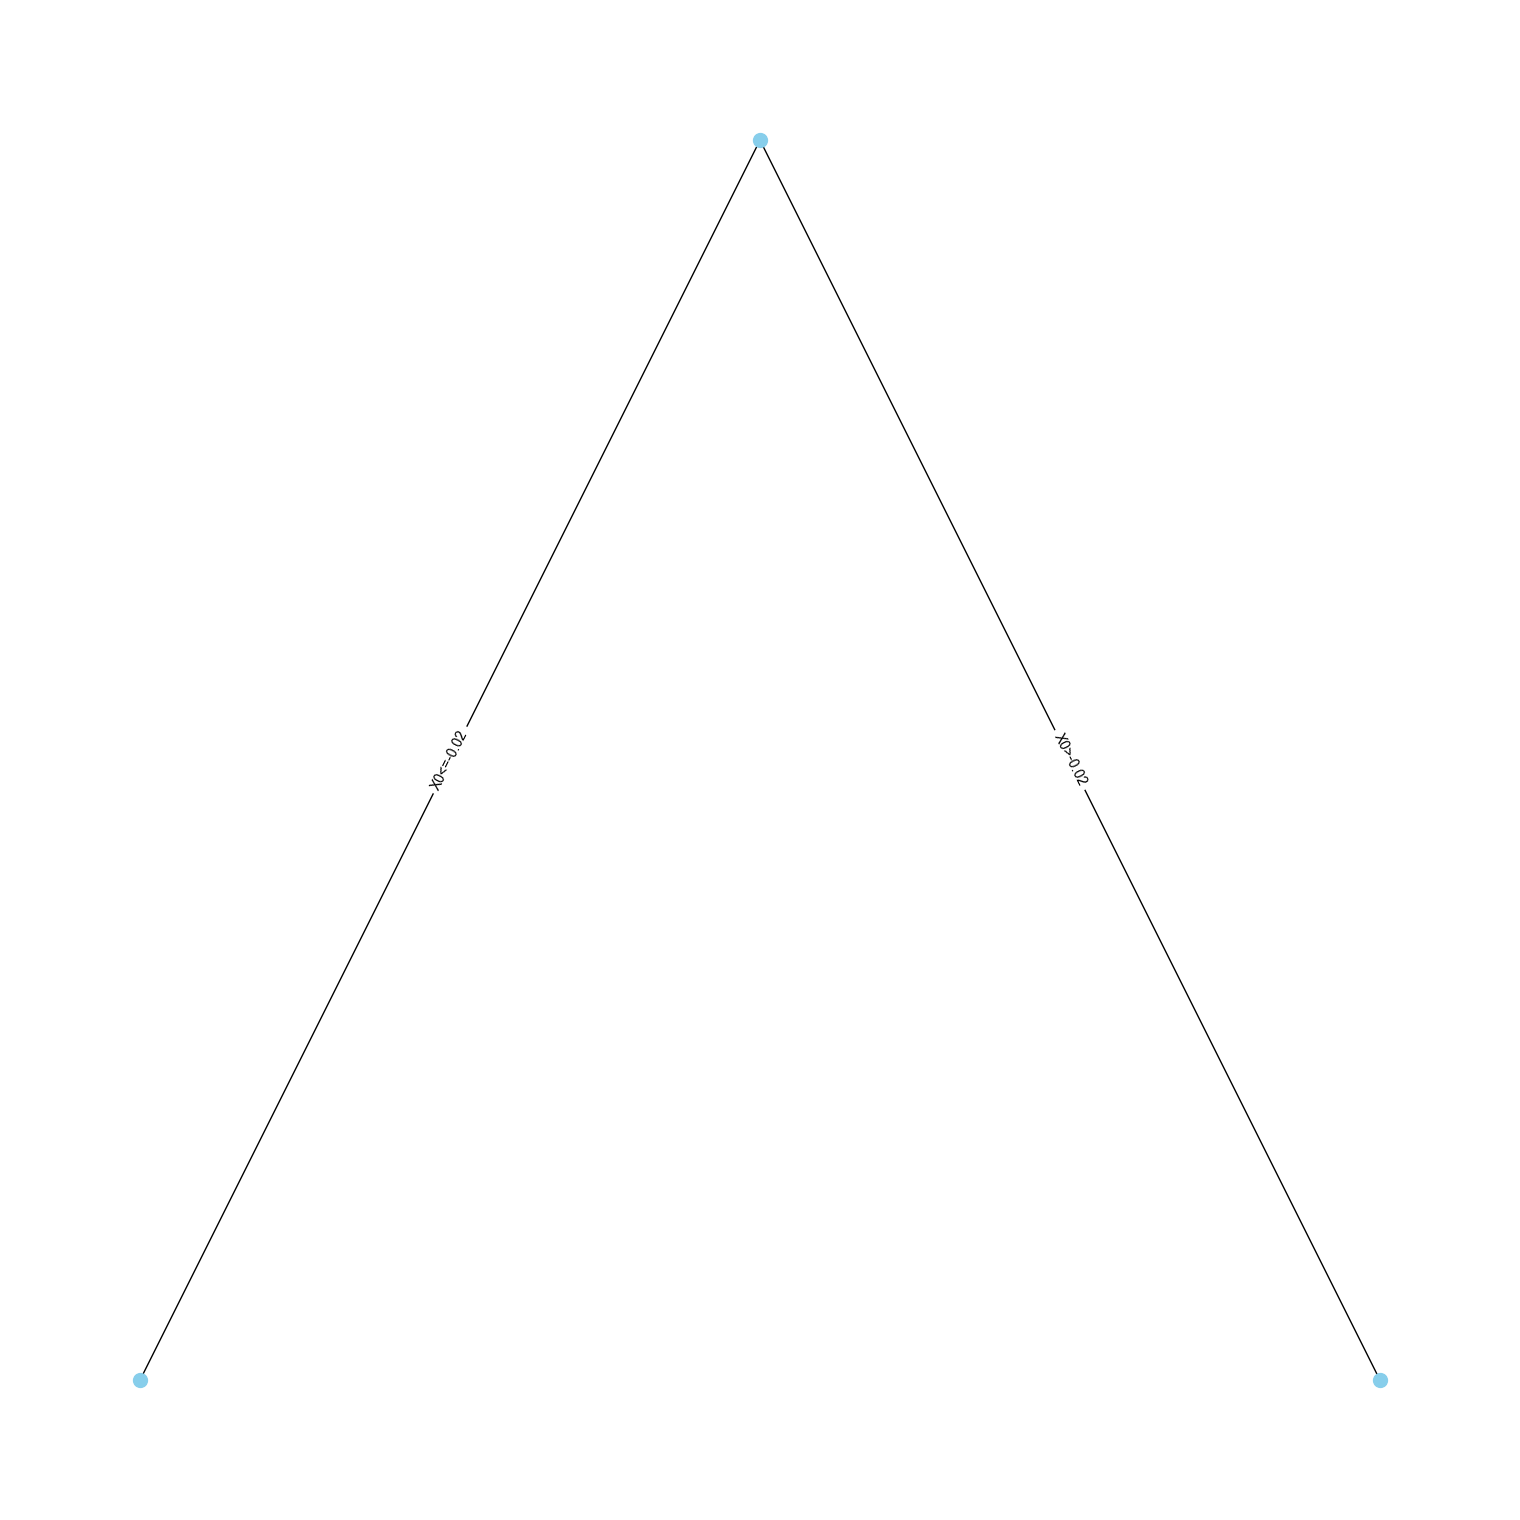

In [77]:
draw_tree(reg_tree.root)

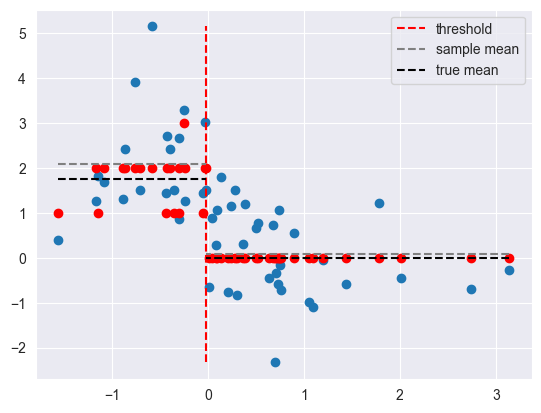

In [78]:
print_split_info(reg_tree.root, X, y, mu)

In [79]:
reg_tree_rand = RegressionTree(min_samples_split=10, max_depth=1, min_proportion=0)
reg_tree_rand.fit(X, y, sd=noise_sd)

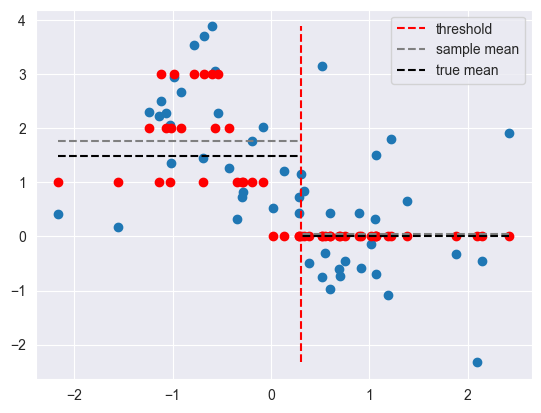

In [74]:
print_split_info(reg_tree_rand.root, X, y, mu)